In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import accuracy_score, f1_score

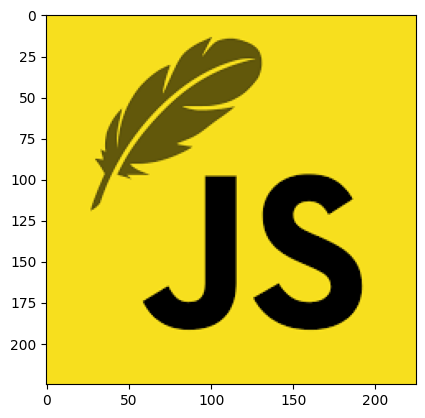

In [2]:
img = cv2.imread("JS.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
def objective_function(vec,out, img):
    # blank mask for drawing the shapes
    shapes = np.zeros_like(img, np.uint8)
    t = out.copy()
    # draw circle
    vec[2] = np.abs(vec[2])
    cv2.circle(shapes, (int(vec[0]), int(vec[1])), int(vec[2]), (vec[3], vec[4], vec[5]), cv2.FILLED)
    mask = shapes.astype(bool)
    t[mask] = cv2.addWeighted(out, 1-vec[6], shapes, vec[6], 0)[mask]

    # plt.imshow(cv2.cvtColor(shapes, cv2.COLOR_BGR2RGB))
    # plt.show()

    #bt = t[: ,: ,0]
    #gt = t[: ,: ,1]
    #rt = t[: ,: ,2]
    #bImg = img[:,:,0]
    #gImg = img[:,:,1]
    #rImg= img[:,:,2]
    # print("(",vec[3],vec[4],vec[5],")")
    return np.sum(np.abs(np.subtract(img,t))) 

    #b  = f1_score(bImg, bt, average='micro')
    #g =  f1_score(gImg, gt, average='micro')
    #r =  f1_score(rImg, rt, average='micro')
    #return np.average((r, g, b)) 
    
out = np.zeros_like(img)
objective_function([100,90, 8, 0,0,255,0.2], out, img) #X,Y,r,R,G,B,alpha

21338019

In [4]:
def draw_circle(vec, out, print = False):
    shapes = np.zeros_like(out, np.uint8)

    cv2.circle(shapes, (int(vec[0]), int(vec[1])), int(vec[2]), (vec[3], vec[4], vec[5]), cv2.FILLED)
    mask = shapes.astype(bool)
    out[mask] = cv2.addWeighted(out, 1-vec[6], shapes, vec[6], 0)[mask]

    if print:
        plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
        plt.show()

In [5]:
w,h,c = img.shape

bounds = [
    [0,w],# x
    [0,h], # y
    [5, (w + h)//4], # radius
    [0,255], # R
    [0,255], # G
    [0,255], # B
    [0.3,1], # alpha
]

# Our Differential Evolution

In [6]:
from differential_evolution import differential_evolution

0 {'P': array([ 4.63901673e+01,  1.40878746e+02,  1.30182533e+03, -8.08174322e+03,
        2.23762694e+02,  5.38783526e+03,  9.60286912e-01]), 'nIt': 100, 'fun': 3236886, 'nFev': 10100}


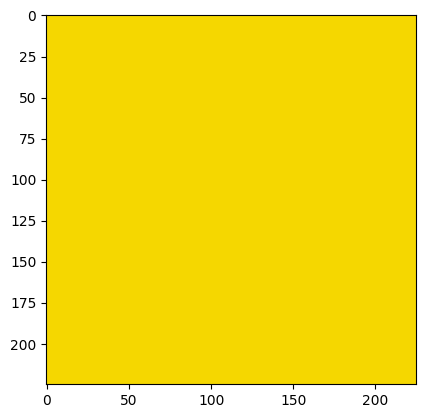

60 {'P': array([1.51188809e+02, 1.88839580e+02, 9.87332887e-01, 3.96388252e+02,
       1.01254195e+02, 1.01809870e+03, 3.85452291e+00]), 'nIt': 100, 'fun': 1888411, 'nFev': 10100}


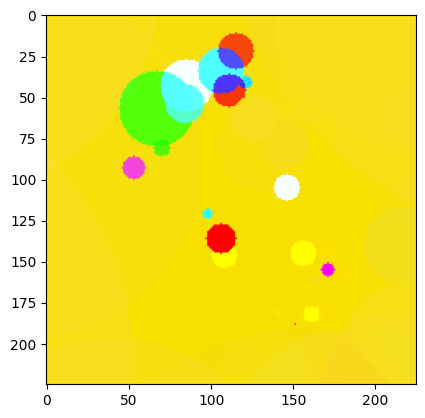

120 {'P': array([ 8.46885686e+01,  1.78886614e+02,  3.29343474e+00, -1.34554106e+03,
        2.37114996e+02,  2.65219552e+02,  7.94135407e-01]), 'nIt': 100, 'fun': 1690315, 'nFev': 10100}


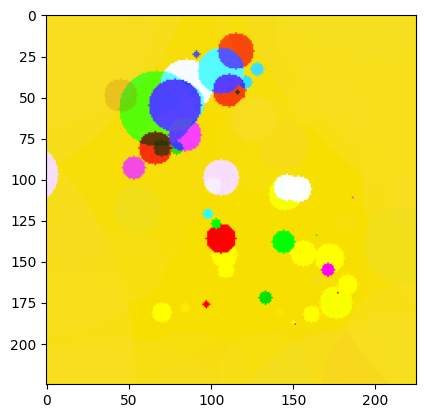

180 {'P': array([ 7.37024703e+01,  6.30395766e+01,  2.99293908e+01, -3.57182997e+02,
        4.12894890e+02, -8.35931659e+02,  7.62169882e-03]), 'nIt': 100, 'fun': 1542169, 'nFev': 10100}


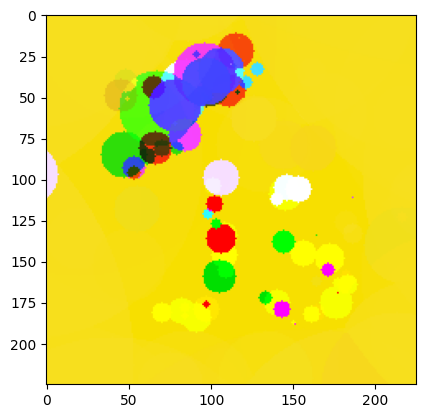

240 {'P': array([ 99.28591527, 169.2678006 ,   4.67681219, 299.83389836,
       140.74212145, 187.91816774,  -1.10414731]), 'nIt': 100, 'fun': 1454049, 'nFev': 10100}


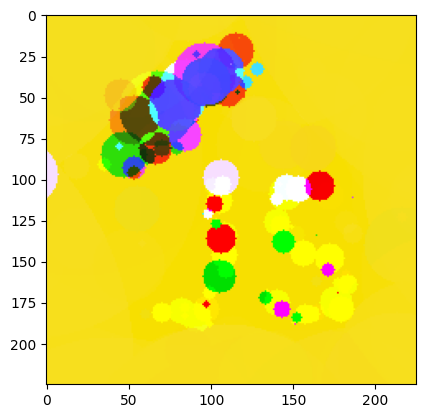

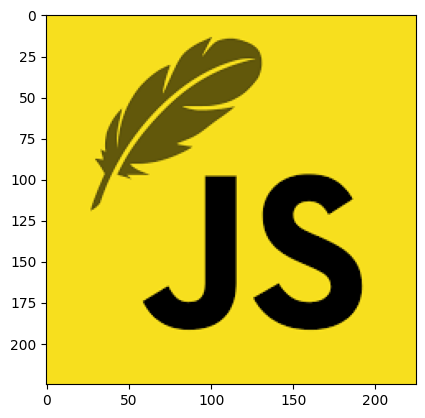

In [7]:
nIter = 300
for i in range(nIter):
    r = differential_evolution(objective_function, bounds, args = (out, img), popSize=100, cR = 0.5, nGen = 100)
    if i % (nIter // 5):
        draw_circle(r["P"], out)
    else:
        print(i, r)
        draw_circle(r["P"], out, True)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Scipy Differential Evolution

In [8]:
from scipy.optimize import differential_evolution

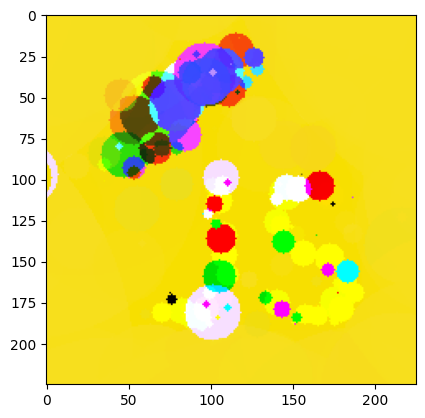

0      fun: 1393715.0
 message: 'Optimization terminated successfully.'
    nfev: 9108
     nit: 12
 success: True
       x: array([128.46666791, 188.58157762,   8.03270978,  30.41728733,
       218.52317457, 234.44240103,   0.4332266 ])


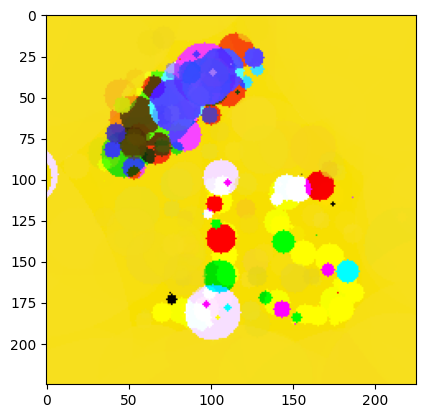

60      fun: 1305724.0
 message: 'Optimization terminated successfully.'
    nfev: 14008
     nit: 19
 success: True
       x: array([ 51.46856564, 132.98127015,  15.85030584,  29.17467606,
       219.87669859, 243.42133173,   0.60906793])


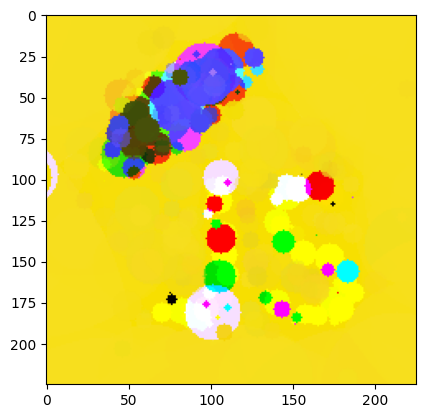

120      fun: 1255393.0
 message: 'Optimization terminated successfully.'
    nfev: 10508
     nit: 14
 success: True
       x: array([ 49.32904944, 177.0461937 ,   9.92158949,  21.50732069,
       221.44578656, 245.95646689,   0.68958966])


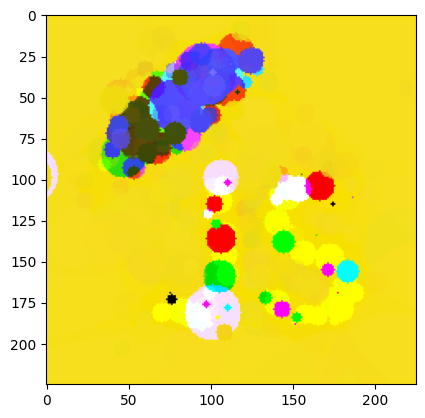

180      fun: 1215363.0
 message: 'Optimization terminated successfully.'
    nfev: 11208
     nit: 15
 success: True
       x: array([125.30111851,  92.94786684,  10.06700745,  31.22445204,
       219.31836148, 242.95928266,   0.63789035])


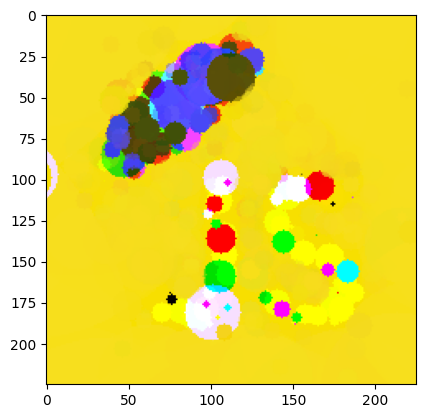

240      fun: 1161176.0
 message: 'Optimization terminated successfully.'
    nfev: 10508
     nit: 14
 success: True
       x: array([153.68526118,  78.1259275 ,   9.13096634,  23.80862967,
       225.47683233, 247.97689891,   0.47415057])


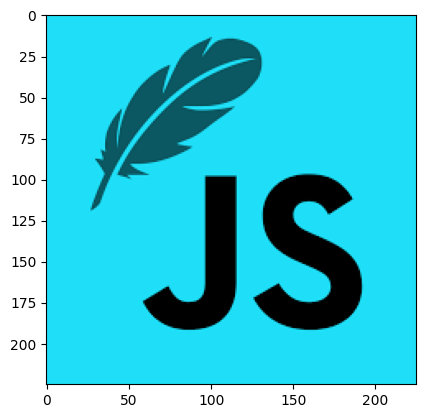

In [9]:
nIter = 300
for i in range(nIter):
    res = differential_evolution(objective_function, bounds, args=(out,img), popsize= 100)
    # plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
    # plt.show()
    if i % (nIter // 5): draw_circle(res.x, out)
    else:
        draw_circle(res.x, out, True)
        print(i, res)
plt.imshow(img)

# Project

## Recommendation

Work along *scipy*. The idea is to make the project behave as scipy does.

Start with something small and easy. With few details and an image of 200 x 200 approx.

## Individual

The individual is recommended to have:

- **x** - x coordinate value of the circle.

- **y** - y coordinate value of the circle.

- **r** - Radius of the circle, recommended value is (3 or something like that to half the image size).

- **Colors** - RGBA

    - Alpha is optional.

## How it works

This algorithm has to execute itself as many times as circles the image has.

Each execution will add a new circle that minimizes the difference between the image we're building and the target one.